In [1]:
import pandas as pd

In [2]:
!pip install seaborn

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-7-1f22fa702166>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

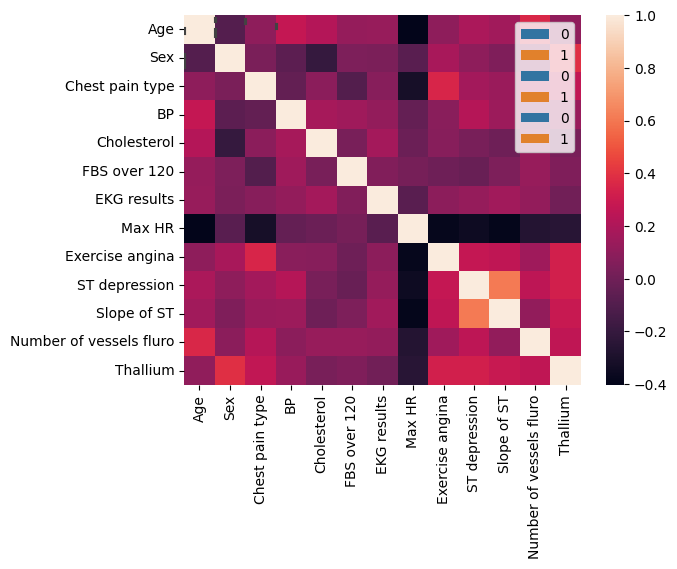

In [7]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)

sns.barplot(x=df['Sex'],y=df['Exercise angina'],hue='Sex',data=df)

sns.barplot(x=df['Sex'],y=df['Cholesterol'],hue='Sex',data=df)

sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],hue='Heart Disease',data=df)

sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

sns.barplot(x=df['Heart Disease'],y=df['ST depression'],data=df)

sns.heatmap(df.corr())

In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [9]:
from sklearn import svm

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
7/7 - 6s - loss: 0.6487 - accuracy: 0.6620 - val_loss: 0.5793 - val_accuracy: 0.8333 - 6s/epoch - 797ms/step
Epoch 2/50
7/7 - 0s - loss: 0.5417 - accuracy: 0.7963 - val_loss: 0.5020 - val_accuracy: 0.9074 - 113ms/epoch - 16ms/step
Epoch 3/50
7/7 - 0s - loss: 0.4649 - accuracy: 0.8287 - val_loss: 0.4444 - val_accuracy: 0.8889 - 86ms/epoch - 12ms/step
Epoch 4/50
7/7 - 0s - loss: 0.4121 - accuracy: 0.8333 - val_loss: 0.4053 - val_accuracy: 0.8889 - 86ms/epoch - 12ms/step
Epoch 5/50
7/7 - 0s - loss: 0.3811 - accuracy: 0.8380 - val_loss: 0.3799 - val_accuracy: 0.8889 - 89ms/epoch - 13ms/step
Epoch 6/50
7/7 - 0s - loss: 0.3609 - accuracy: 0.8519 - val_loss: 0.3667 - val_accuracy: 0.8704 - 96ms/epoch - 14ms/step
Epoch 7/50
7/7 - 0s - loss: 0.3447 - accuracy: 0.8519 - val_loss: 0.3605 - val_accuracy: 0.8704 - 84ms/epoch - 12ms/step
Epoch 8/50
7/7 - 0s - loss: 0.3331 - accuracy: 0.8657 - val_loss: 0.3544 - val_accuracy: 0.8704 - 213ms/epoch - 30ms/step
Epoch 9/50
7/7 - 0s - loss: 0.3

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8333333134651184


In [16]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [17]:
#data baru
import numpy as np

In [18]:
new_data = np.array([[32, 1, 2, 115, 260, 1, 0, 170, 1, 1.6, 1, 0, 3]])  # Presence/absence tidak dimasukkan (target)
new_data_scaled = scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
# Prediksi dengan menggunakan madel yang telah dilatih
predictions = model.predict(new_data_scaled)

1/1 [==============================] - 0s 245ms/step


In [20]:
# konversi ke yes atau no dengan  threshold (0.5)
binary_predictions = (predictions > 0.5).astype(int)

In [21]:
print(f"Predicted Probability: {predictions[0][0]}")
print(f"Binary Prediction: {binary_predictions[0][0]}")
print()

if (binary_predictions==0):
    print("Absence...")
else:
    print("Presence")

print()

Predicted Probability: 4.9212183512281626e-05
Binary Prediction: 0

Absence...



In [22]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [24]:

# Kemudian, simpan objek classifier ke dalam file menggunakan pickle
filename = 'penyakitjantung_model.sav'
with open(filename, 'wb') as f:
    pickle.dump(predictions, f)
